Index:190098M

Question 01

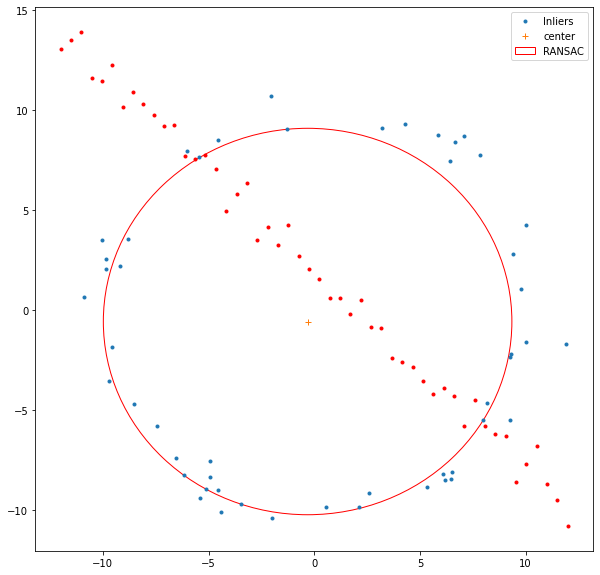

In [14]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
# np . random.seed ( 0 )
fig, ax = plt.subplots(figsize=(10,10))
N = 100
half_n = N//2
r = 10
s = r/16
t = np.random.uniform (0 , 2*np.pi,half_n )
n = s*np . random.randn ( half_n )
x , y = ( r + n)*np.cos ( t ) , ( r + n)*np.sin ( t )
X_circ = np.hstack ( ( x.reshape ( half_n , 1 ) , y.reshape ( half_n , 1 ) ) )

iterations = 100
inlier_ratio = 0.95
threshold_dist = 1
threshold_inlier_counts =40
def calc_center(x1,x2,x3,y1,y2,y3):
    a = (x1-x2)**2 + (y1-y2)**2
    b = (x2-x3)**2 + (y2-y3)**2
    c = (x3-x1)**2 + (y3-y1)**2
    p = 2*(a*b + b*c + c*a) - (a*a + b*b + c*c) 
    X = (b*(c+a-b)*x1 + c*(a+b-c)*x2 + a*(b+c-a)*x3) / p
    Y = (b*(c+a-b)*y1 + c*(a+b-c)*y2 + a*(b+c-a)*y3) / p 
    ar = a**0.5
    br = b**0.5
    cr = c**0.5 
    radius = ar*br*cr / ((ar+br+cr)*(-ar+br+cr)*(ar-br+cr)*(ar+br-cr))**0.5

    return ((X,Y),radius)   

for i in range(0,iterations,1):
    rand1,rand2,rand3 = np.random.randint(50),np.random.randint(50),np.random.randint(50)
    point1,point2,point3 = X_circ[rand1],X_circ[rand2],X_circ[rand3]
    x1,y1,x2,y2,x3,y3 = point1[0],point1[1],point2[0],point2[1],point3[0],point3[1]
    center,radius = calc_center(x1,x2,x3,y1,y2,y3)
    inliers = 0
    for j in range(0,half_n):
        d=((X_circ[j][0]-center[0])**2 +(X_circ[j][1]-center[1])**2)**0.5
        
        if(abs(d-radius)<=threshold_dist):
            inliers+=1

    if(threshold_inlier_counts<=inliers):
        ax.plot(x,y,".",label="Inliers")
        ax.plot(center[0],center[1],'+',label='center')
        draw_circle = plt.Circle((center[0],center[1]), radius,fill=False,color='r',label='RANSAC')
        ax.add_artist(draw_circle)
        plt.legend()
        break
m,b = -1,2
s=r/16
x_line = np.linspace(-12,12,half_n)
y_line = m*x_line+b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n,1), y.reshape(half_n,1)))
X = np.vstack((X_circ,X_line))
plt.plot(x_line,y_line,".",color='r')
plt.show()


Question 03

In [ ]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

# read images
img1 = cv2.imread('graffity/img1.ppm')  
img2 = cv2.imread('graffity/img5.ppm') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#sift
sift = cv.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.figure(figsize=(20,10))
plt.imshow(img3),plt.show()